# 09wk-2: 순환신경망 (1)

최규빈  
2022-11-01

> 순환신경망 intro (1)– ab예제, embedding layer

# 강의영상

> <https://youtube.com/playlist?list=PLQqh36zP38-zya4QF67x6DZfNtJRF-iPc>

# import

In [ ]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

# Define some funtions

`-` 활성화함수들

In [ ]:
sig = torch.nn.Sigmoid()
soft = torch.nn.Softmax(dim=1)
tanh = torch.nn.Tanh()

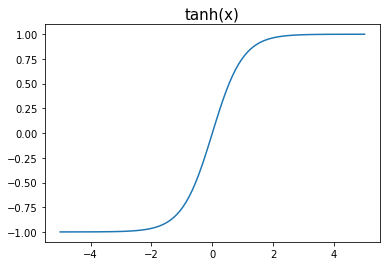

In [ ]:
_x = torch.linspace(-5,5,100)
plt.plot(_x,tanh(_x))
plt.title("tanh(x)", size=15)

`-` 문자열 -\> 숫자로 바꾸는 함수

In [ ]:
def f(txt,mapping):
    return [mapping[key] for key in txt] 

(사용예시1)

In [ ]:
txt = ['a','b','a']
mapping = {'a':33,'b':-22}
print('변환전: %s'% txt)
print('변환후: %s'% f(txt,mapping))

변환전: ['a', 'b', 'a']
변환후: [33, -22, 33]

(사용예시2)

In [ ]:
txt = ['a','b','a']
mapping = {'a':[1,0],'b':[0,1]}
print('변환전: %s'% txt)
print('변환후: %s'% f(txt,mapping))

변환전: ['a', 'b', 'a']
변환후: [[1, 0], [0, 1], [1, 0]]

# Exam1: ab

## data

In [ ]:
txt = list('ab')*100
txt[:10]

In [ ]:
txt_x = txt[:-1]
txt_y = txt[1:]

In [ ]:
txt_x[:5],txt_y[:5]

## 선형모형을 이용한 풀이

### ***(풀이1) 1개의 파라메터 – 실패***

`-` 데이터정리

In [ ]:
x = torch.tensor(f(txt_x,{'a':0,'b':1})).float().reshape(-1,1)
y = torch.tensor(f(txt_y,{'a':0,'b':1})).float().reshape(-1,1)

In [ ]:
x[:5],y[:5]

`-` 학습 및 결과 시각화

In [ ]:
net = torch.nn.Linear(in_features=1,out_features=1,bias=False)
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())

In [ ]:
for epoc in range(5000):
    ## 1
    yhat = net(x) 
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

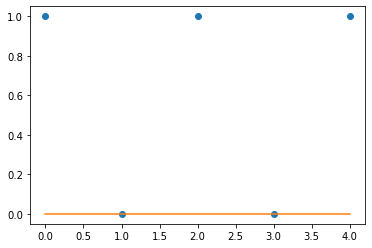

In [ ]:
plt.plot(y[:5],'o')
plt.plot(net(x).data[:5])

-   잘 학습이 안되었다.

`-` 학습이 잘 안된 이유

In [ ]:
pd.DataFrame({'x':x[:5].reshape(-1),'y':y[:5].reshape(-1)})

현재 $\hat{y}_i = \hat{w}x_i$ 꼴의 아키텍처이고 $y_i \approx \hat{w}x_i$
가 되는 적당한 $\hat{w}$를 찾아야 하는 상황

-   $(x_i,y_i)=(0,1)$ 이면 어떠한 $\hat{w}$를 선택해도
    $y_i \approx \hat{w}x_i$를 만드는 것이 불가능  
-   $(x_i,y_i)=(1,0)$ 이면 $\hat{w}=0$일 경우 $y_i \approx \hat{w}x_i$로
    만드는 것이 가능

상황을 종합해보니 $\hat{w}=0$으로 학습되는 것이 그나마 최선

### ***(풀이2) 1개의 파라메터 – 성공, but 확장성이 없는 풀이***

`-` 0이라는 값이 문제가 되므로 인코딩방식의 변경

In [ ]:
x = torch.tensor(f(txt_x,{'a':-1,'b':1})).float().reshape(-1,1) 
y = torch.tensor(f(txt_y,{'a':-1,'b':1})).float().reshape(-1,1)

In [ ]:
x[:5],y[:5]

In [ ]:
net = torch.nn.Linear(in_features=1,out_features=1,bias=False)
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())

In [ ]:
for epoc in range(2000):
    ## 1
    yhat = net(x) 
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

`-` 결과는 성공

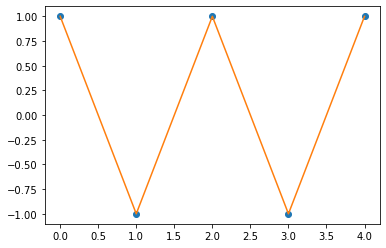

In [ ]:
plt.plot(y[:5],'o')
plt.plot(net(x).data[:5])

-   딱봐도 클래스가 3개일 경우 확장이 어려워 보인다.

## 로지스틱 모형을 이용한 풀이

### ***(풀이1) 1개의 파라메터 – 실패***

`-` 데이터를 다시 a=0, b=1로 정리

In [ ]:
mapping = {'a':0,'b':1}
x = torch.tensor(f(txt_x,mapping)).float().reshape(-1,1)
y = torch.tensor(f(txt_y,mapping)).float().reshape(-1,1)

In [ ]:
x[:5],y[:5]

`-` 학습

In [ ]:
net = torch.nn.Linear(in_features=1,out_features=1,bias=False)
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizr = torch.optim.Adam(net.parameters())

In [ ]:
for epoc in range(5000):
    ## 1
    yhat = net(x) 
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

`-` 결과

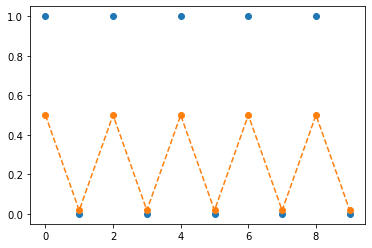

In [ ]:
plt.plot(y[:10],'o')
plt.plot(sig(net(x)).data[:10],'--o')

`-` 결과해석: 예상되었던 실패임

-   아키텍처는 $\hat{y}_i = \text{sig}(\hat{w}x_i)$ 꼴이다.
-   $(x_i,y_i)=(0,1)$ 이라면 어떠한 $\hat{w}$을 선택해도 $\hat{w}x_i=0$
    이다. 이경우 $\hat{y}_i = \text{sig}(0) = 0.5$ 가 된다.
-   $(x_i,y_i)=(1,0)$ 이라면 $\hat{w}=-5$와 같은 값으로 선택하면
    $\text{sig}(-5) \approx 0 = y_i$ 와 같이 만들 수 있다.
-   상황을 종합하면 net의 weight는 $\text{sig}(\hat{w}x_i) \approx 0$ 이
    되도록 적당한 음수로 학습되는 것이 최선임을 알 수 있다.

In [ ]:
net.weight # 적당한 음수값으로 학습되어있음을 확인

### ***(풀이2) 2개의 파라메터 + 좋은 초기값 – 성공***

`-` 동일하게 a=0, b=1로 맵핑

In [ ]:
mapping = {'a':0,'b':1}
x = torch.tensor(f(txt_x,mapping)).float().reshape(-1,1)
y = torch.tensor(f(txt_y,mapping)).float().reshape(-1,1)

In [ ]:
x[:5],y[:5]

`-` 네트워크에서 bias를 넣기로 결정함

In [ ]:
net = torch.nn.Linear(in_features=1,out_features=1,bias=True)
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizr = torch.optim.Adam(net.parameters())

`-` net의 초기값을 설정 (이것은 좋은 초기값임)

In [ ]:
net.weight.data = torch.tensor([[-5.00]])
net.bias.data = torch.tensor([+2.500])

In [ ]:
net(x)[:10]

`-` 학습전 결과

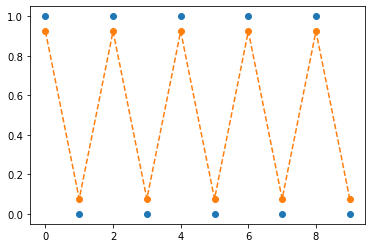

In [ ]:
plt.plot(y[:10],'o')
plt.plot(sig(net(x)).data[:10],'--o')

`-` 학습후결과

In [ ]:
for epoc in range(5000):
    ## 1
    yhat = net(x) 
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

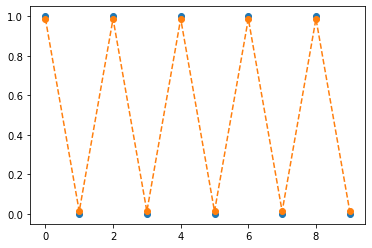

In [ ]:
plt.plot(y[:10],'o')
plt.plot(sig(net(x)).data[:10],'--o')

### ***(풀이3) 2개의 파라메터 + 나쁜초기값 – 성공***

`-` a=0, b=1

In [ ]:
mapping = {'a':0,'b':1}
x = torch.tensor(f(txt_x,mapping)).float().reshape(-1,1)
y = torch.tensor(f(txt_y,mapping)).float().reshape(-1,1)

In [ ]:
x[:5],y[:5]

`-` 이전과 동일하게 바이어스가 포함된 네트워크 설정

In [ ]:
net = torch.nn.Linear(in_features=1,out_features=1,bias=True)
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizr = torch.optim.Adam(net.parameters())

`-` 초기값설정 (이 초기값은 나쁜 초기값임)

In [ ]:
net.weight.data = torch.tensor([[+5.00]])
net.bias.data = torch.tensor([-2.500])

In [ ]:
net(x)[:10]

`-` 학습전상태: 반대모양으로 되어있다.

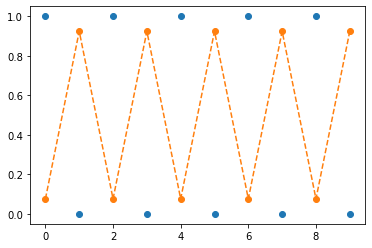

In [ ]:
plt.plot(y[:10],'o')
plt.plot(sig(net(x)).data[:10],'--o')

`-` 학습

In [ ]:
for epoc in range(5000):
    ## 1
    yhat = net(x) 
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

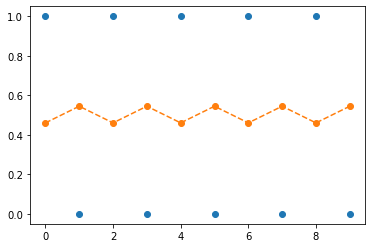

In [ ]:
plt.plot(y[:10],'o')
plt.plot(sig(net(x)).data[:10],'--o')

-   결국 수렴하긴 할듯

### ***(풀이4) 3개의 파라메터를 쓴다면?***

`-` a=0, b=1로 코딩

In [ ]:
mapping = {'a':0,'b':1}
x = torch.tensor(f(txt_x,mapping)).float().reshape(-1,1)
y = torch.tensor(f(txt_y,mapping)).float().reshape(-1,1)

In [ ]:
x[:5],y[:5]

`-` 3개의 파라메터를 사용하기 위해서 아래와 같은 구조를 생각하자.

``` python
torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=1,bias=True),
    torch.nn.ACTIVATION_FUNCTION(),
    torch.nn.Linear(in_features=1,out_features=1,bias=False)
)
```

위와 같은 네트워크를 설정하면 3개의 파라메터를 사용할 수 있다. 적절한
ACTIVATION_FUNCTION을 골라야 하는데 실험적으로 tanh가 적절하다고
알려져있다. ($\to$ 그래서 우리도 실험적으로 이해해보자)

------------------------------------------------------------------------

(예비학습1) net(x)와 사실 net.forwardx(x)는 같다.

In [ ]:
net(x)[:5] # 풀이3에서 학습한 네트워크임

In [ ]:
net.forward(x)[:5] # 풀이3에서 학습한 네트워크임

그래서 net.forward를 재정의하면 net(x)의 기능을 재정의 할 수 있다.

In [ ]:
net.forward = lambda x: 1 

-   “lambda x: 1” 은 입력이 x 출력이 1인 함수를 의미 (즉 입력값에
    상관없이 항상 1을 출력하는 함수)
-   “net.forward = lambda x:1” 이라고 새롭게 선언하였므로 앞으론
    net.forward(x), net(x) 도 입력값에 상관없이 항상 1을 출력하게 될
    것임

In [ ]:
net(x)

(예비학습2) torch.nn.Module을 상속받아서 네트워크를 만들면 (= “class
XXX(torch.nn.Module):” 와 같은 방식으로 클래스를 선언하면) 약속된
아키텍처를 가진 네트워크를 찍어내는 함수를 만들 수 있다.

(예시1)

In [ ]:
class Mynet1(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = torch.nn.Linear(in_features=1,out_features=1,bias=True)
        self.a1 = torch.nn.Sigmoid()
        self.l2 = torch.nn.Linear(in_features=1,out_features=1,bias=False)
    def forward(self,x):
        yhat = self.l2(self.a1(self.l1(x)))
        return yhat

이제

``` python
net = Mynet1()
```

는 아래와 같은 효과를 가진다.

``` python
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=1,bias=True),
    torch.nn.Sigmoid(),
    torch.nn.Linear(in_features=1,out_features=1,bias=False)
)
```

(예시2)

In [ ]:
class Mynet2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = torch.nn.Linear(in_features=1,out_features=1,bias=True)
        self.a1 = torch.nn.ReLU()
        self.l2 = torch.nn.Linear(in_features=1,out_features=1,bias=False)
    def forward(self,x):
        yhat = self.l2(self.a1(self.l1(x)))
        return yhat

이제

``` python
net = Mynet2()
```

는 아래와 같은 효과를 가진다.

``` python
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=1,bias=True),
    torch.nn.RuLU(),
    torch.nn.Linear(in_features=1,out_features=1,bias=False)
)
```

(예시3)

In [ ]:
class Mynet3(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = torch.nn.Linear(in_features=1,out_features=1,bias=True)
        self.a1 = torch.nn.Tanh()
        self.l2 = torch.nn.Linear(in_features=1,out_features=1,bias=False)
    def forward(self,x):
        yhat = self.l2(self.a1(self.l1(x)))
        return yhat

이제

``` python
net = Mynet3()
```

는 아래와 같은 효과를 가진다.

``` python
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=1,bias=True),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=1,out_features=1,bias=False)
)
```

***클래스에 대한 이해가 부족한 학생을 위한 암기방법***

**step1:** 아래와 코드를 복사하여 틀을 만든다. (이건 무조건 고정임, XXXX
자리는 원하는 이름을 넣는다)

``` python
class XXXX(torch.nn.Module):
    def __init__(self):
        super().__init__()
        ## 우리가 사용할 레이어를 정의 
        
        ## 레이어 정의 끝
    def forward(self,x):
        ## yhat을 어떻게 구할것인지 정의 
        
        ## 정의 끝
        return yhat
```

-   net(x)에 사용하는 x임, yhat은 net.forward(x) 함수의 리턴값임
-   사실, x/yhat은 다른 변수로 써도 무방하나 (예를들면 input/output
    이라든지) 설명의 편의상 x와 yhat을 고정한다.

**step2:** `def __init__(self):`에 사용할 레이어를 정의하고 이름을
붙인다. 이름은 항상 `self.xxx` 와 같은 식으로 정의한다.

``` python
class XXXX(torch.nn.Module):
    def __init__(self):
        super().__init__()
        ## 우리가 사용할 레이어를 정의 
        self.xxx1 = torch.nn.Linear(in_features=1,out_features=1,bias=True)
        self.xxx2 = torch.nn.Tanh()
        self.xxx3 = torch.nn.Linear(in_features=1,out_features=1,bias=True)
        ## 레이어 정의 끝
    def forward(self,x):
        ## yhat을 어떻게 구할것인지 정의 
        
        ## 정의 끝
        return yhat
```

**step3:** `def forward:`에 “x –\> yhat” 으로 가는 과정을 묘사한 코드를
작성하고 yhat을 리턴하도록 한다.

``` python
class XXXX(torch.nn.Module):
    def __init__(self):
        super().__init__()
        ## 우리가 사용할 레이어를 정의 
        self.xxx1 = torch.nn.Linear(in_features=1,out_features=1,bias=True)
        self.xxx2 = torch.nn.Tanh()
        self.xxx3 = torch.nn.Linear(in_features=1,out_features=1,bias=True)
        ## 레이어 정의 끝
    def forward(self,x):
        ## yhat을 어떻게 구할것인지 정의 
        u = self.xxx1(x) 
        v = self.xxx2(u)
        yhat = self.xxx3(v) 
        ## 정의 끝
        return yhat
```

예비학습 끝

------------------------------------------------------------------------

`-` 우리가 하려고 했던 것: 아래의 아키텍처에서

``` python
torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=1,bias=True),
    torch.nn.ACTIVATION_FUNCTION(),
    torch.nn.Linear(in_features=1,out_features=1,bias=False)
)
```

ACTIVATION의 자리에 tanh가 왜 적절한지 직관을 얻어보자.

`-` 실험결과1(Sig): Sigmoid activation을 포함한 아키텍처로 학습시킨
25개의 적합결과

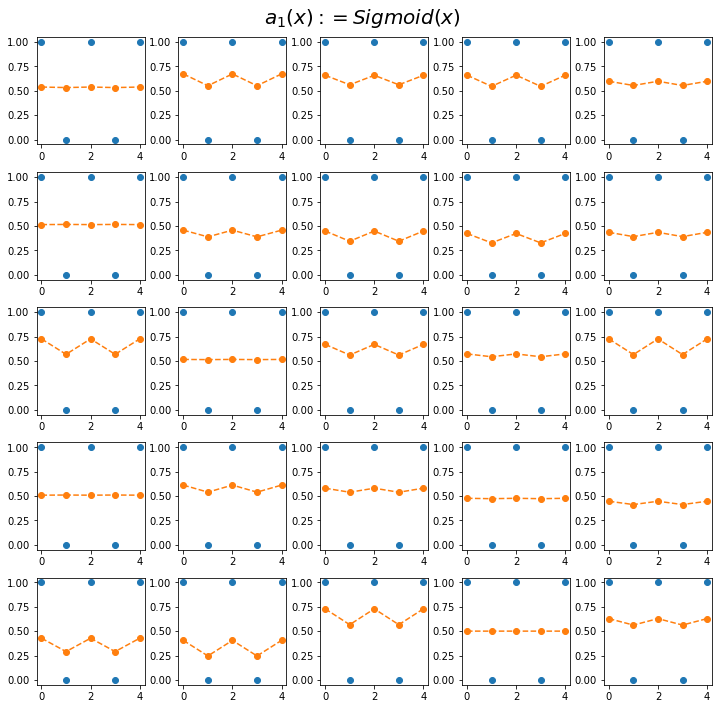

In [ ]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        net = Mynet1()
        loss_fn = torch.nn.BCEWithLogitsLoss()
        optimizr = torch.optim.Adam(net.parameters())
        for epoc in range(1000):
            ## 1
            yhat = net(x)
            ## 2
            loss = loss_fn(yhat,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        ax[i][j].plot(y[:5],'o')
        ax[i][j].plot(sig(net(x[:5])).data,'--o')
fig.suptitle(r"$a_1(x):=Sigmoid(x)$",size=20)
fig.tight_layout()

`-` 실험결과2(ReLU): RuLU activation을 포함한 아키텍처로 학습시킨 25개의
적합결과

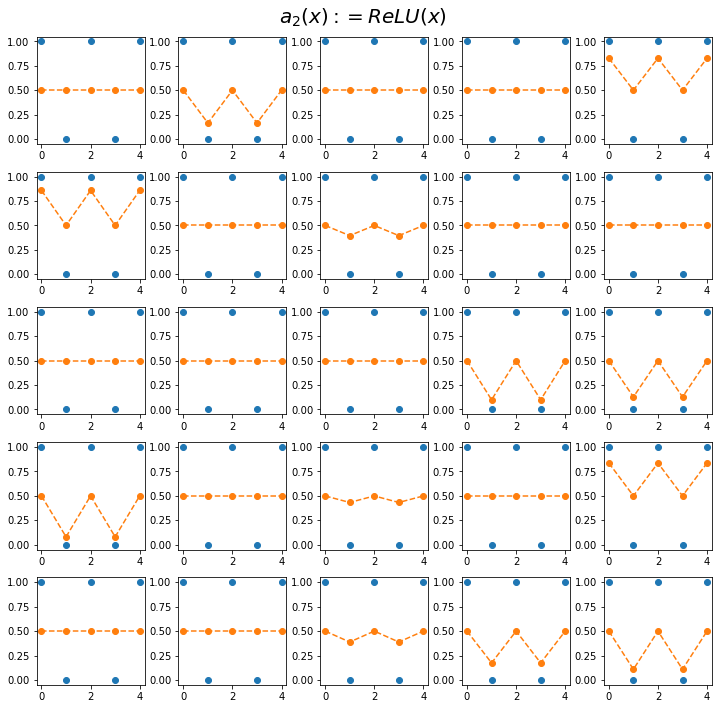

In [ ]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        net = Mynet2()
        loss_fn = torch.nn.BCEWithLogitsLoss()
        optimizr = torch.optim.Adam(net.parameters())
        for epoc in range(1000):
            ## 1
            yhat = net(x)
            ## 2
            loss = loss_fn(yhat,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        ax[i][j].plot(y[:5],'o')
        ax[i][j].plot(sig(net(x[:5])).data,'--o')
fig.suptitle(r"$a_2(x):=ReLU(x)$",size=20)
fig.tight_layout()

`-` 실험결과3(Tanh): Tanh activation을 포함한 아키텍처로 학습시킨 25개의
적합결과

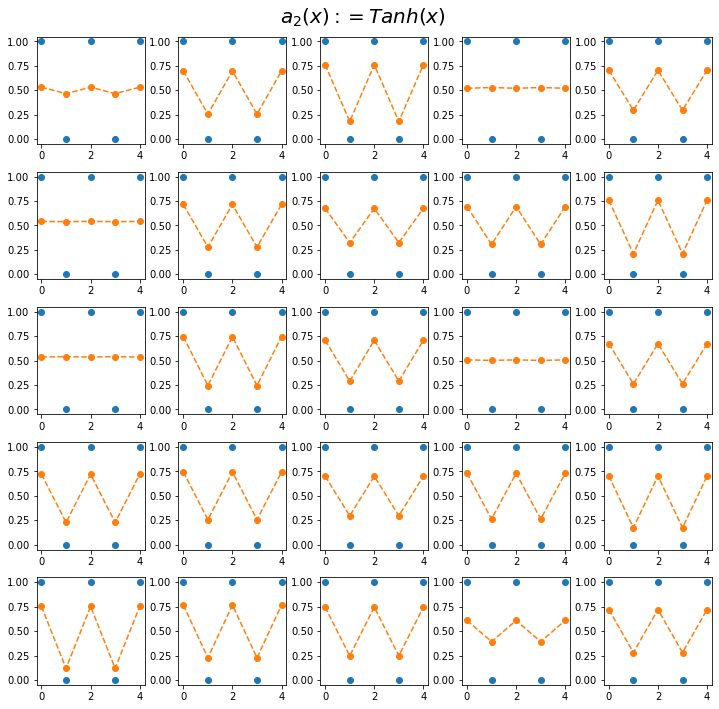

In [ ]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        net = Mynet3()
        loss_fn = torch.nn.BCEWithLogitsLoss()
        optimizr = torch.optim.Adam(net.parameters())
        for epoc in range(1000):
            ## 1
            yhat = net(x)
            ## 2
            loss = loss_fn(yhat,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        ax[i][j].plot(y[:5],'o')
        ax[i][j].plot(sig(net(x[:5])).data,'--o')
fig.suptitle(r"$a_2(x):=Tanh(x)$",size=20)        
fig.tight_layout()

`-` 실험해석 - sig: 주황색선의 변동폭이 작음 + 항상 0.5근처로 머무는
적합값이 존재 - relu: 주황색선의 변동폭이 큼 + 항상 0.5근처로 머무는
적합값이 존재 - tanh: 주황색선의 변동폭이 큼 + 0.5근처로 머무는 적합값이
존재X

`-` 실험해보니까 tanh가 우수한것 같다. $\to$ 앞으로는 tanh를 쓰자.

## 소프트맥스로 확장

### (풀이1) 로지스틱모형에서 3개의 파라메터 버전을 그대로 확장

In [ ]:
mapping = {'a':[1,0],'b':[0,1]}
x = torch.tensor(f(txt_x,mapping)).float().reshape(-1,2)
y = torch.tensor(f(txt_y,mapping)).float().reshape(-1,2)
x[:5],y[:5]

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=2,out_features=1),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=1,out_features=2,bias=False)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [ ]:
for epoc in range(5000):
    ## 1
    yhat = net(x)
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [ ]:
y[:5][:,0]

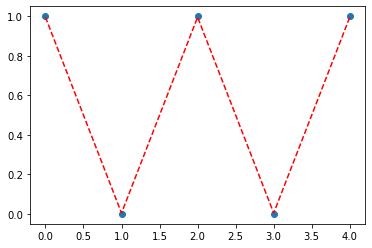

In [ ]:
plt.plot(y[:5][:,1],'o')
plt.plot(soft(net(x[:5]))[:,1].data,'--r')

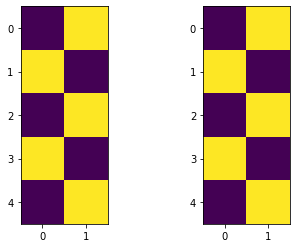

In [ ]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(y[:5])
ax[1].imshow(soft(net(x[:5])).data)

# Embedding Layer

## motive

`-` 결국 최종적으로는 아래와 같은 맵핑방식이 확장성이 있어보인다.

In [ ]:
mapping = {'a':[1,0,0],'b':[0,1,0],'c':[0,0,1]} # 원핫인코딩 방식 

`-` 그런데 매번 $X$를 원핫인코딩하고 Linear 변환하는것이 번거로운데 이를
한번에 구현하는 함수가 있으면 좋겠다. $\to$ torch.nn.Embedding Layer가
그 역할을 한다.

In [ ]:
mapping = {'a':0,'b':1,'c':2}
x = torch.tensor(f(list('abc')*100,mapping))
y = torch.tensor(f(list('bca')*100,mapping))
x[:5],y[:5]

In [ ]:
torch.manual_seed(43052)
ebdd = torch.nn.Embedding(num_embeddings=3,embedding_dim=1)

In [ ]:
ebdd(x)[:5]

`-` 그런데 사실 언뜻보면 아래의 linr 함수와 역할의 차이가 없어보인다.

In [ ]:
torch.manual_seed(43052)
linr = torch.nn.Linear(in_features=1,out_features=1)

In [ ]:
linr(x.float().reshape(-1,1))[:5]

`-` 차이점: 파라메터수에 차이가 있다.

In [ ]:
ebdd.weight

In [ ]:
linr.weight, linr.bias

결국 ebdd는 아래의 구조에 해당하는 파라메터들이고

-   $\text{x[:5]}= \begin{bmatrix} 0 \\ 1 \\ 2 \\ 0 \\ 1 \end{bmatrix} \Longrightarrow \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \\ 1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix} \quad net(x)= \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \\ 1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}\begin{bmatrix} -0.8178 \\ -0.7052 \\ -0.5843 \end{bmatrix} = \begin{bmatrix} -0.8178 \\ -0.7052 \\ -0.5843 \\ -0.8178 \\ -0.7052 \end{bmatrix}$

linr는 아래의 구조에 해당하는 파라메터이다.

-   $\text{x[:5]}= \begin{bmatrix} 0 \\ 1 \\ 2 \\ 0 \\ 1 \end{bmatrix} \quad net(x)= \begin{bmatrix} 0 \\ 1 \\ 2 \\ 0 \\ 1 \end{bmatrix} \times (-0.3467) + (-0.8470)=\begin{bmatrix} -0.8470 \\ -1.1937 \\ -1.5404 \\ -0.8470 \\ -1.1937 \end{bmatrix}$

## 연습 (ab문제 소프트맥스로 확장한 것 다시 풀이)

`-` 맵핑

In [ ]:
mapping = {'a':0,'b':1}
x = torch.tensor(f(txt_x,mapping))
y = torch.tensor(f(txt_y,mapping))
x[:5],y[:5]

`-` torch.nn.Embedding 을 넣은 네트워크

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Embedding(num_embeddings=2,embedding_dim=1),
    torch.nn.Tanh(),
    torch.nn.Linear(in_features=1,out_features=2)
)
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

`-` 학습

In [ ]:
for epoc in range(5000):
    ## 1
    yhat = net(x)
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

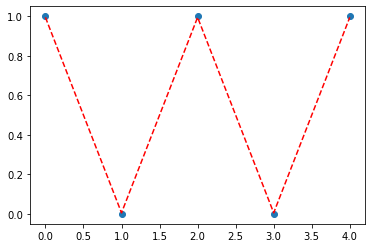

In [ ]:
plt.plot(y[:5],'o')
plt.plot(soft(net(x[:5]))[:,1].data,'--r')

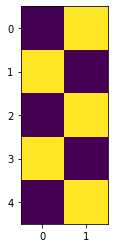

In [ ]:
plt.imshow(soft(net(x[:5])).data)

------------------------------------------------------------------------

# HW

아래의 코드를 관찰하라.

In [20]:
x = [0,1]*5
y = [1,0]*5
torch.manual_seed(43052) # 편의상 시드를 고정 
ebdd = torch.nn.Embedding(num_embeddings=2,embedding_dim=1)

In [21]:
ebdd.weight

ebdd(x)의 출력결과를 예측하여 작성하라.

(풀이)

굳이 실행해보지 않아도 아래임을 알 수 있다.

-   $\text{x}= \begin{bmatrix} 0 \\ 1 \\ 0 \\ 1 \\ 0 \\ 1 \\ 0 \\ 1 \\ 0 \\ 1 \end{bmatrix} \Longrightarrow \begin{bmatrix} 1 & 0 \\ 0 & 1 \\ 1 & 0 \\ 0 & 1 \\ 1 & 0 \\ 0 & 1 \\ 1 & 0 \\ 0 & 1 \\ 1 & 0 \\ 0 & 1 \end{bmatrix} \quad net(x)= \begin{bmatrix} 1 & 0 \\ 0 & 1 \\ 1 & 0 \\ 0 & 1 \\ 1 & 0 \\ 0 & 1 \\ 1 & 0 \\ 0 & 1 \\ 1 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} -0.8178 \\ -0.7052 \end{bmatrix} = \begin{bmatrix} -0.8178 \\ -0.7052 \\ -0.8178 \\ -0.7052 \\-0.8178 \\ -0.7052 \\-0.8178 \\ -0.7052 \\-0.8178 \\ -0.7052 \end{bmatrix}$

실행해보면서 확인

In [22]:
x = torch.tensor(x) # ebdd에 넣기위해서 x를 텐서로 변환
x

In [23]:
ebdd(x)